# Multi-level Lead Brick Configuration

## Loading the MDF Objects

The calibration data MDF object.

In [2]:
from MuDataFrame import *
import copy
import glob

path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/calibration_new_set_up/*.csv"
lead_files = glob.glob(path)


mdfo_c = [] #collection of objects

for file in lead_files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_calib = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_calib = copy.copy(mdfo_c[0])
mdfo_calib.events_df = mdf_calib

mdfo_calib.longDataMode()

mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib.copy()
mdfo_calib.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,2021-05-03 12:40:15.812760,0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.455446,NaN,0.342978,622,-5.445887,-22.562492,-6.807692,-22.684615,day,0
1,1,1,2021-05-03 12:40:16.502963,0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.002813,NaN,0.703353,622,-11.762760,-21.506829,-11.538462,-21.784615,day,690203
2,2,2,2021-05-03 12:40:16.672924,0,1.0,1.0,1.0,1.0,1.0,1.0,...,14.672630,NaN,0.210716,622,35.347122,13.620282,36.676923,14.884615,day,860164
3,3,3,2021-05-03 12:40:16.892987,0,1.0,1.0,1.0,1.0,1.0,1.0,...,15.284964,NaN,0.259347,622,24.903617,25.826667,27.746154,29.153846,day,1080227
4,4,4,2021-05-03 12:40:17.563102,0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.253100,NaN,11.038012,622,6.978340,14.482143,7.676923,15.230769,day,1750342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,99995,599995,2021-05-06 05:26:40.560984,0,1.0,1.0,1.0,1.0,1.0,1.0,...,11.550160,NaN,0.702196,627,-17.648284,30.295912,-19.438462,31.353846,night,215705748224
599996,99996,599996,2021-05-06 05:26:40.718620,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.313777,NaN,0.855732,627,-4.219669,-1.791967,-4.330769,-1.153846,night,215705905860
599997,99997,599997,2021-05-06 05:26:41.098536,0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.092934,NaN,0.580193,627,1.253839,-1.953890,0.976923,-1.715385,night,215706285776
599998,99998,599998,2021-05-06 05:26:41.258900,0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.351891,NaN,0.553780,627,2.472213,-1.681108,2.161538,-2.061538,night,215706446140


The new config data MDF object.

In [3]:
from MuDataFrame import *

mdfo_lead = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/multi_lead_config.csv")
mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead.copy()
#mdfo_calib.show()

## Legacy 

In [ ]:
from MuDataFrame import *

mdfo_calib = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/calibration_data/calibration_data_updated.csv")
mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib.copy()
#mdfo_calib.show()

In [1]:
from MuDataFrame import *
import copy
import glob

path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/multi_level_lead/*.csv"
lead_files = glob.glob(path)
"""
r1,r2 = 584, 592
path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/multi_level_lead/run{}.csv"
#path = "processed_data/run{}.csv"
lead_files = [path.format(i) for i in range(r1,r2+1)]
"""

mdfo_c = [] #collection of objects

for file in lead_files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_lead = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_lead = copy.copy(mdfo_c[0])
mdfo_lead.events_df = mdf_lead

mdfo_lead.longDataMode()

mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead.copy()
mdfo_lead.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,2021-04-16 13:31:06.823417,0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.698015,NaN,0.859016,584,-11.688995,-29.003056,-12.276923,-27.938462,day,0
1,1,1,2021-04-16 13:31:07.112220,0,1.0,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,584,-11.146882,NaN,-11.200000,NaN,day,288803
2,2,2,2021-04-16 13:31:07.242037,0,1.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,584,NaN,NaN,NaN,NaN,day,418620
3,3,3,2021-04-16 13:31:07.492069,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.237844,NaN,0.794456,584,15.460397,-6.497405,15.761538,-5.915385,day,668652
4,4,4,2021-04-16 13:31:08.112115,0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.834476,NaN,2.771599,584,5.275796,-14.770635,6.484615,-15.438462,day,1288698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463632,76734,3463632,2021-05-03 12:29:31.503258,0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.964946,NaN,1.129557,621,-11.502079,24.766403,-12.046154,24.492308,day,1248140679841
3463633,76735,3463633,2021-05-03 12:29:32.153445,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.535235,NaN,0.383824,621,18.000000,14.459528,19.107692,15.430769,day,1248141330028
3463634,76736,3463634,2021-05-03 12:29:33.323529,0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.857782,NaN,0.259827,621,12.689732,15.717325,12.176923,16.415385,day,1248141500112
3463635,76737,3463635,2021-05-03 12:29:33.783809,0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.042613,NaN,0.735671,621,19.931590,1.037736,21.476923,1.430769,day,1248141960392


# Analyzing the effects of change of position of Bottom Plate

In [4]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

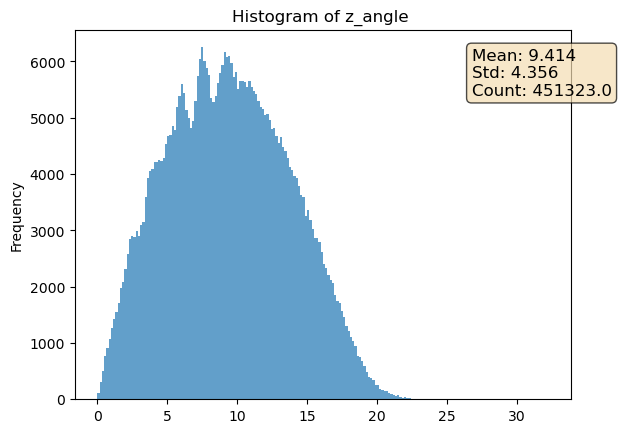

In [5]:
mdfo_calib.getHistogram("z_angle")

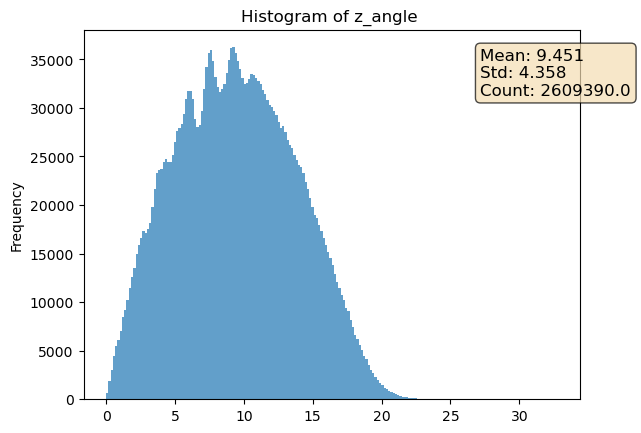

In [6]:
mdfo_lead.getHistogram("z_angle")

# Generating Tomograms

### Helper Functions

In [7]:
import copy

def getXatZPlane_diffTDC(x1, x2, zplane, dsep):
    x = (zplane / dsep) * (
        getPhysicalUnitsFromDiffTDC(x1) -
        getPhysicalUnitsFromDiffTDC(x2)) + getPhysicalUnitsFromDiffTDC(x1)
    return x

def getPhysicalUnitsFromDiffTDC(tdc):
    return (55 / 130) * tdc

def getSameShapeDataSets(mdfo1, mdfo2):
    mdfo1 =  copy.copy(mdfo1)
    mdfo2 = copy.copy(mdfo2)
    s1 = len(mdfo1.events_df.index)
    s2 = len(mdfo2.events_df.index)
    s = min(s1,s2)
    mdfo1.events_df =  mdfo1.events_df.iloc[:s]
    mdfo2.events_df =  mdfo2.events_df.iloc[:s]
    return mdfo1, mdfo2

def getSameSizeData(mdfo1, mdfo2, data_term):
    mdfo1, mdfo2 = getSameShapeDataSets(mdfo1, mdfo2)
    return mdfo1.get(data_term), mdfo2.get(data_term)

def getRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    h = h1 / h2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()


def getNormalizedRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("multi_level/multi_level_lead_{}.png".format(title.strip()))
  #  plt.show()

    
def getNormalizedRatioPlotMatrix( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    return h.T
    
def getNormalizedRatioPlot_nonCenter( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("multi_level/tomogram_{}.png".format(title.strip()))
  #  plt.show()
    
    
def getNormalizedRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("multi_level/tomogram_{}.png".format(title.strip()))
   # plt.show()
    
    
def getTomogramMatrix(xview, yview, axes=[-30,30], bins=(15,15),title="Data"):
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xview, yview, bins=bins, range=ranges)
    normH = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
   # return normH, , xedges, yedges
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, normH.T)
    plt.title("Reco Z plane XY View ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()

## Tomograms at different binning

In [8]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, yy_lead = mdfo_lead.get("xx1"), mdfo_lead.get("yy1")
xx_calib, yy_calib = mdfo_calib.get("xx1"), mdfo_calib.get("yy1")

binn = 21

getNormalizedRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Bins = {}".format(binn))

In [9]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, yy_lead = mdfo_lead.get("xx1"), mdfo_lead.get("yy1")
xx_calib, yy_calib = mdfo_calib.get("xx1"), mdfo_calib.get("yy1")

image_list = []

for binn in range(9,33,2):
    image_list.append("multi_level/tomogram_{}.png".format("Bins = {}".format(binn).strip()))
    getNormalizedRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Bins = {}".format(binn))

# Tomogram Using Muon Rate

# Holographic Reconstruction

In [10]:
def getProjectionData_diff(mdfo, zplane=42, dsep=165):
    xx_lead = getXatZPlane_diffTDC(mdfo.get("diffL1"), mdfo.get("diffL3"),
                                   zplane, dsep)
    yy_lead = getXatZPlane_diffTDC(mdfo.get("diffL2"), mdfo.get("diffL4"),
                                   zplane, dsep)

    return np.array(xx_lead), np.array(yy_lead)

zplanes = np.array([2+(n-1)*4 for n in range(1,27)])
x_strings = ["xx{}".format(int(i)) for i in zplanes ]
y_strings = ["yy{}".format(int(i)) for i in zplanes ]

In [11]:
for i in range(len(zplanes)):
    mdfo_calib.events_df[x_strings[i]], mdfo_calib.events_df[y_strings[i]] = getProjectionData_diff(mdfo_calib, zplane=zplanes[i], dsep=165)
    mdfo_lead.events_df[x_strings[i]], mdfo_lead.events_df[y_strings[i]] = getProjectionData_diff(mdfo_lead, zplane=zplanes[i], dsep=165)

In [12]:
mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead

mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib

In [13]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

binn = 21
I_matrices = []


for i in range(len(zplanes)):
    xx_lead, yy_lead = mdfo_lead.get(x_strings[i]), mdfo_lead.get(y_strings[i])
    xx_calib, yy_calib = mdfo_calib.get(x_strings[i]), mdfo_calib.get(y_strings[i])
    getNormalizedRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Distance from Top Tray = {} cm".format(int(zplanes[i])))
    I_matrices.append(getNormalizedRatioPlotMatrix([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Distance from Top Tray = {} cm".format(int(zplanes[i]))))

In [14]:
I_matrices_reshaped = np.array(I_matrices).reshape(np.array(I_matrices).shape[0], -1)
np.savetxt("multi_level/image_matrics_multi_level_lead_new_calib.csv", I_matrices_reshaped)

# Tomogram with Hit Frequency Per Pixel

In [17]:
def getTomogramMatrix(xview, yview, axes=[-30,30], bins=(15,15),title="Data"):
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xview, yview, bins=bins, range=ranges)
    #normH = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
   # return normH, , xedges, yedges
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h1.T)
    plt.title("Reco Z plane XY View ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()

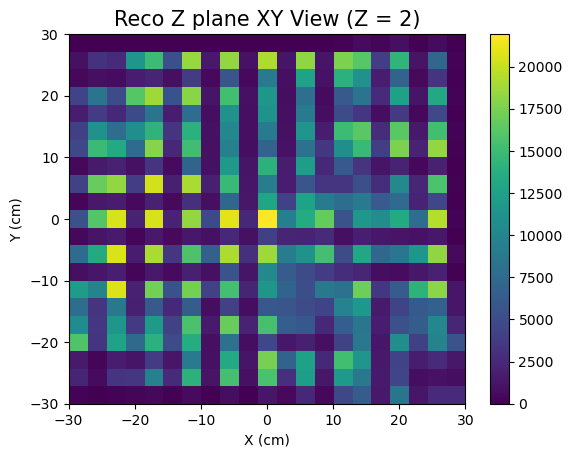

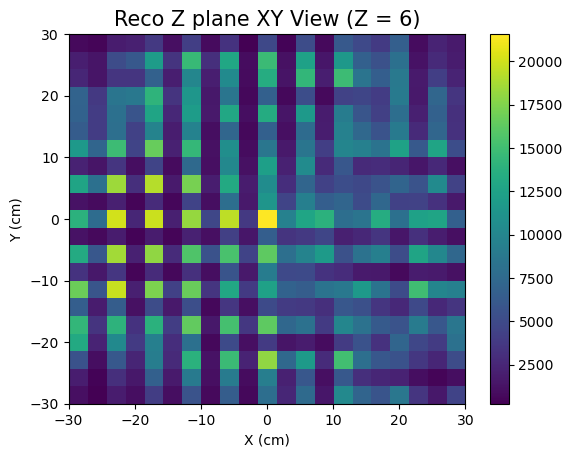

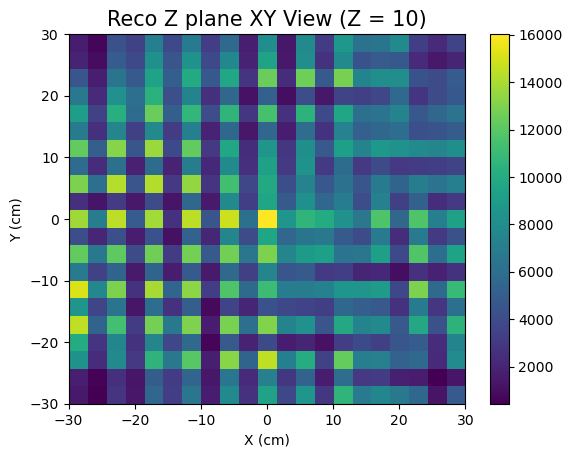

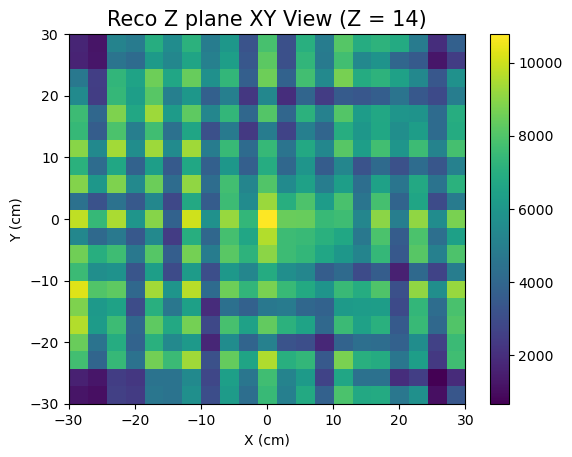

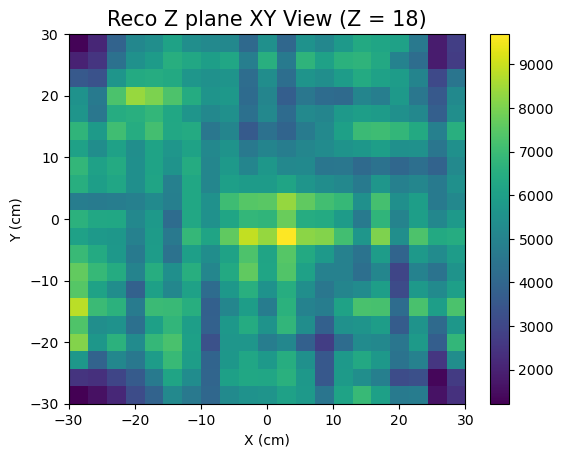

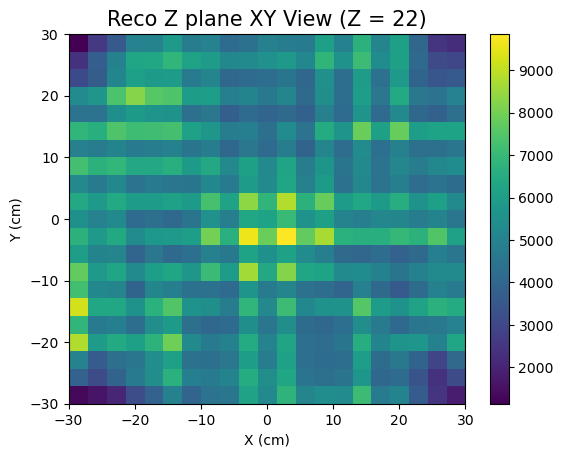

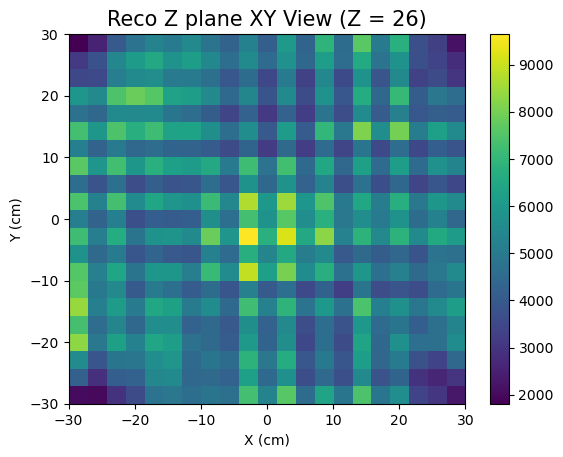

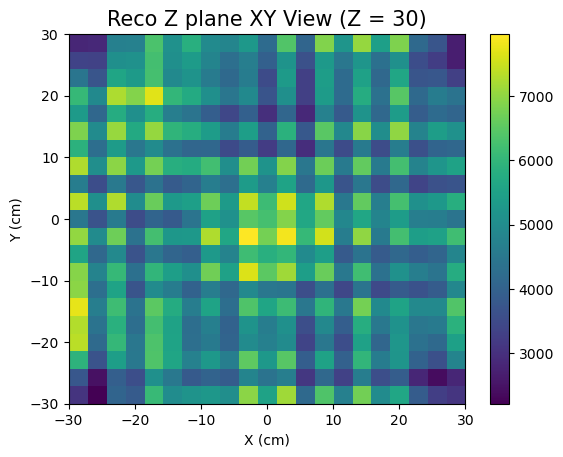

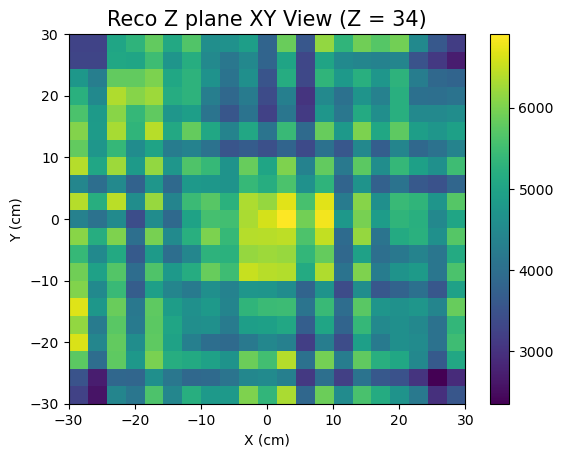

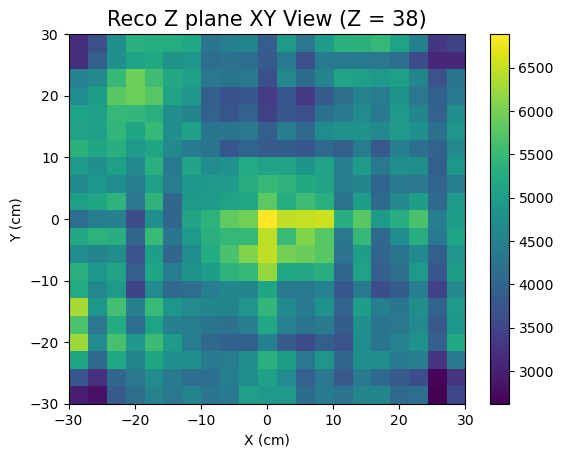

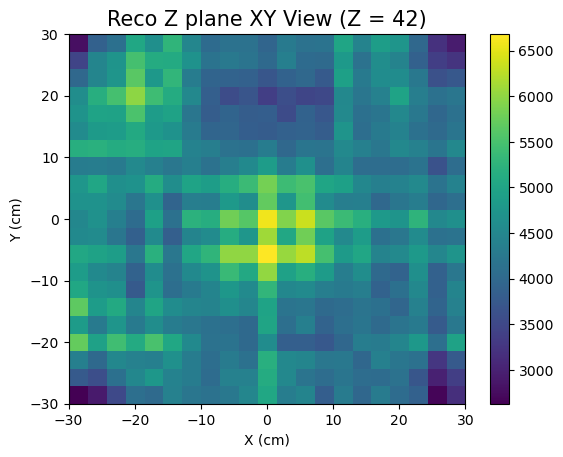

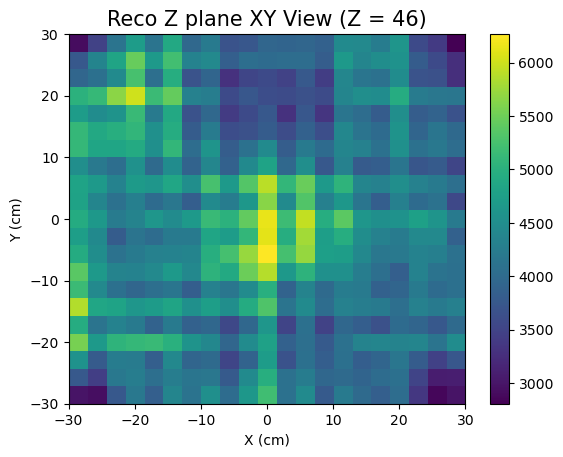

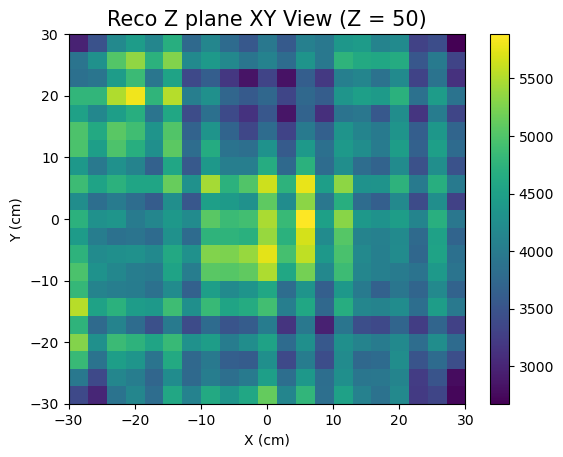

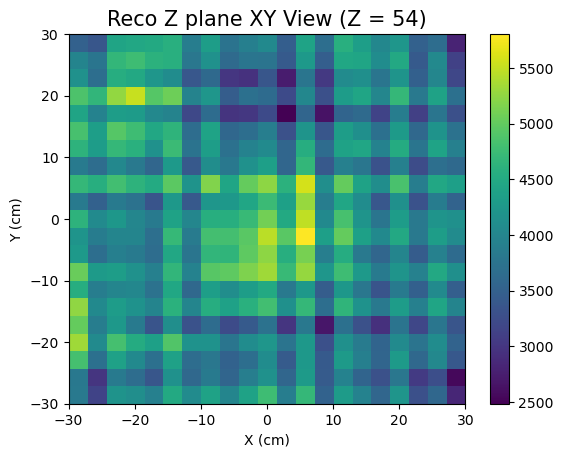

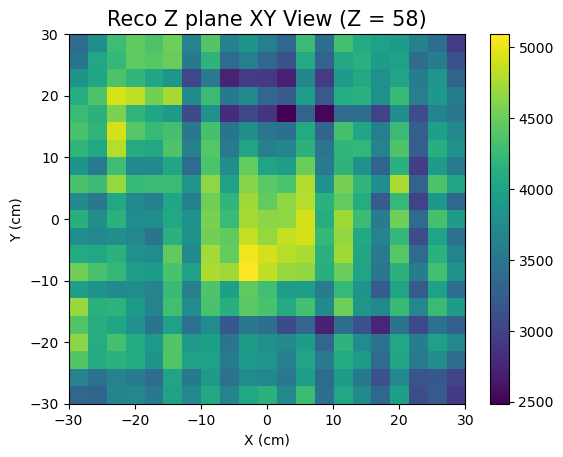

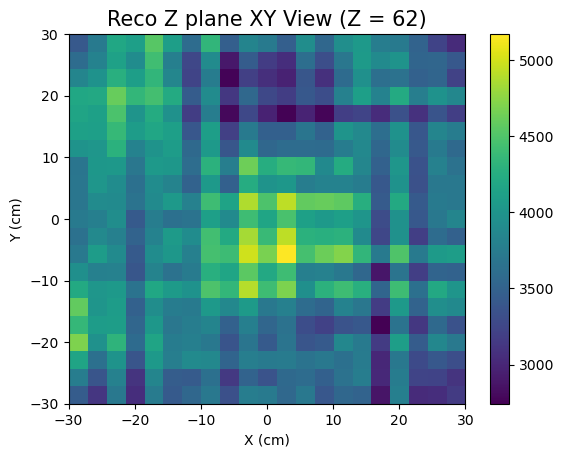

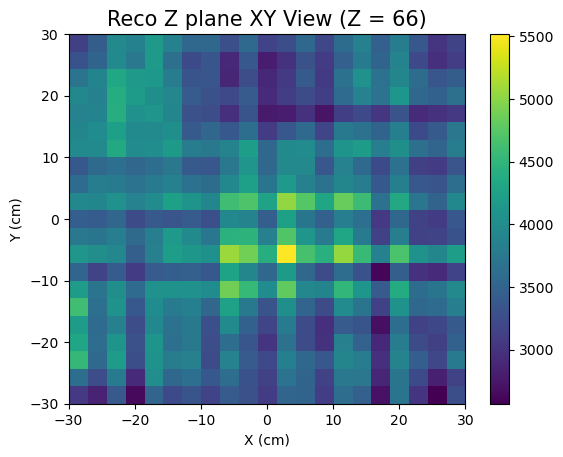

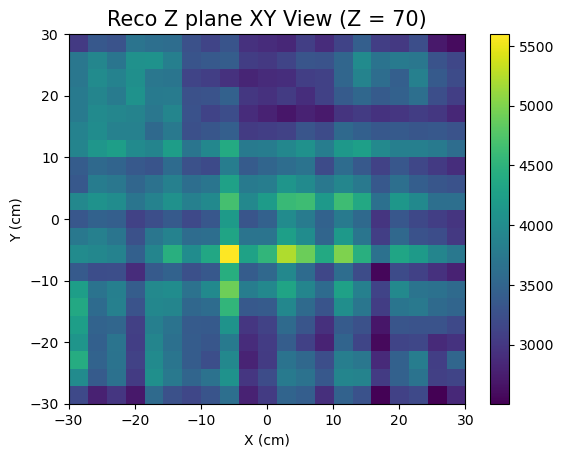

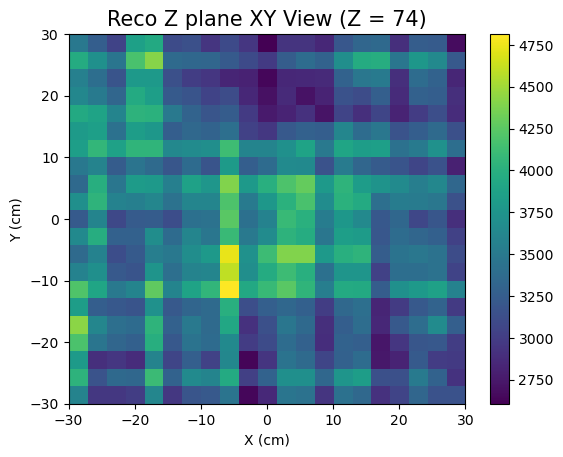

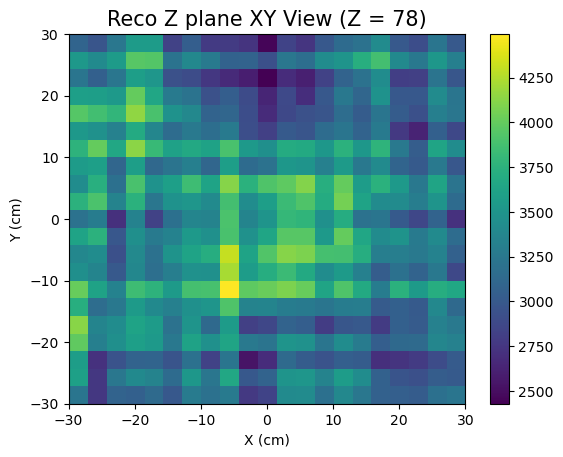

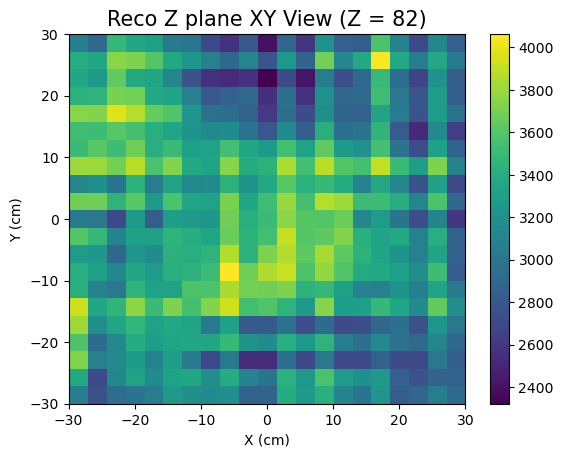

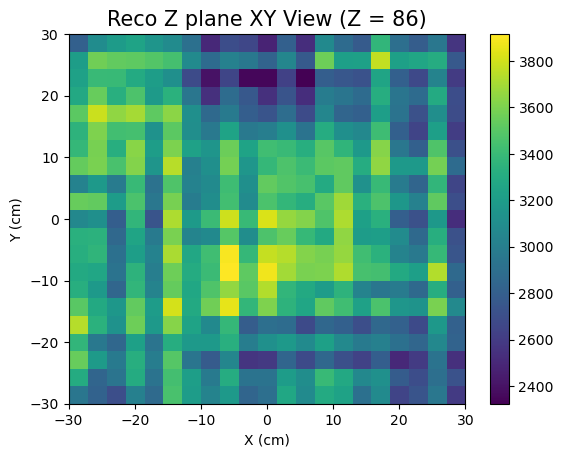

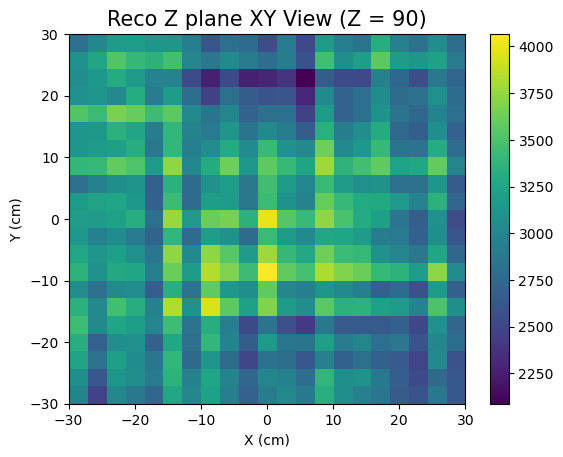

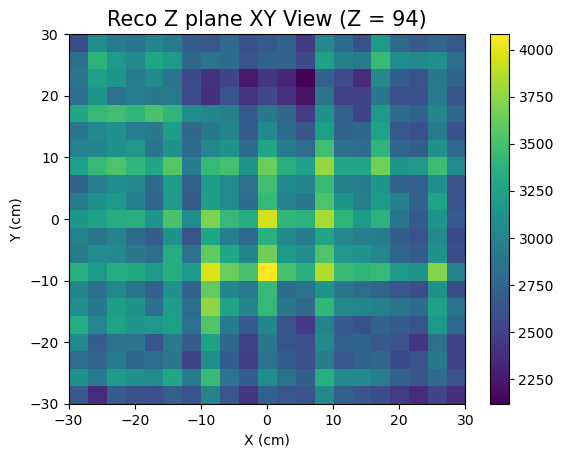

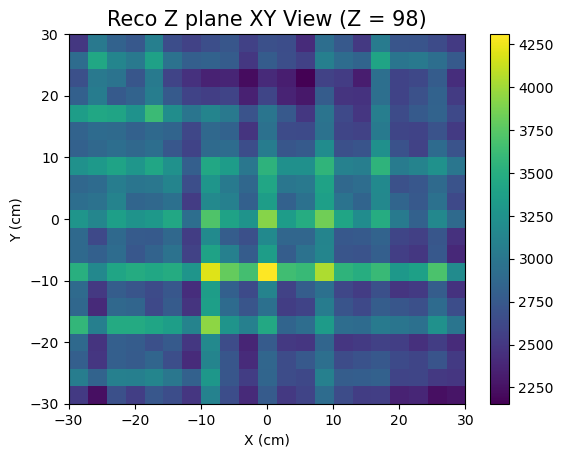

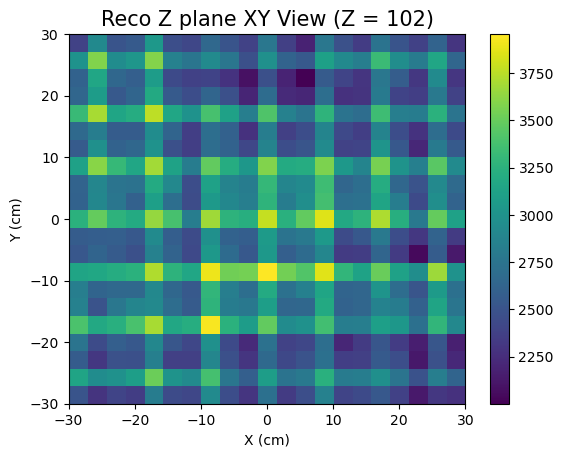

In [18]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

binn = 21

for i in range(len(zplanes)):
    xx_lead, yy_lead = mdfo_lead.get(x_strings[i]), mdfo_lead.get(y_strings[i])
    getTomogramMatrix(xx_lead, yy_lead, axes=[-30,30], bins=(binn,binn),title="Z = {}".format(zplanes[i]))